In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing as pre
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import shutil
import os
import requests
import base64



/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#load the data
train_pd = pd.read_csv("/Users/soonam/Desktop/HKUST/Courses/MSBD5001/Project/Kaggle/train.csv")
test_pd = pd.read_csv("/Users/soonam/Desktop/HKUST/Courses/MSBD5001/Project/Kaggle/test.csv")


In [3]:
print('Training data shape {}'.format(train_pd.shape))
print('Testing data shape{}'.format(test_pd.shape))


Training data shape (400, 15)
Testing data shape(100, 14)


In [4]:
#Feature engineering..
#Hot encoding for  penalty column
#train_pd.penalty.unique();
#one hot encoding
#training data
train_pd_encoded = pd.get_dummies(train_pd, columns=['penalty'])
train_pd_encoded['n_classes'] = train_pd_encoded.n_classes.astype('category')
train_pd_encoded['n_clusters_per_class'] = train_pd_encoded.n_clusters_per_class.astype('category')
train_pd_encoded['n_informative'] = train_pd_encoded.n_informative.astype('category')
train_pd_encoded['n_jobs'] = train_pd_encoded.n_jobs.astype('category')
train_pd_encoded['alpha'] = train_pd_encoded.alpha.astype('category')


#testing data
test_pd_encoded = pd.get_dummies(test_pd, columns=['penalty'])
test_pd_encoded['n_classes'] = test_pd_encoded.n_classes.astype('category')
test_pd_encoded['n_clusters_per_class'] = test_pd_encoded.n_clusters_per_class.astype('category')
test_pd_encoded['n_informative'] = test_pd_encoded.n_informative.astype('category')
test_pd_encoded['n_jobs'] = test_pd_encoded.n_jobs.astype('category')
test_pd_encoded['alpha'] = test_pd_encoded.alpha.astype('category')

#test_pd_encoded.head()#
#randomseed = np.random.seed(0)


In [5]:
#select columns
X_before_train = train_pd_encoded[['l1_ratio', 'alpha', 'max_iter', 'random_state', 'n_jobs',
      'n_samples', 'n_features', 'n_classes', 'n_clusters_per_class',
       'n_informative', 'flip_y', 'scale',
        'penalty_elasticnet','penalty_l1', 'penalty_l2', 'penalty_none']]

y_before_train = train_pd_encoded['time']
x_to_be_predicted = test_pd_encoded.drop('id',axis=1)


In [8]:
print('Training Feature  shape {}'.format(X_before_train.shape))
print('Training Label data shape {}'.format(y_before_train.shape))

print('Testing data shape{}'.format(x_to_be_predicted.shape))

Training Feature  shape (400, 16)
Training Label data shape (400,)
Testing data shape(100, 16)


In [9]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [156]:
#create model
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
sgd=keras.optimizers.SGD(lr=0.0001,nesterov=True)
def build_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_before_train.shape[1],)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=sgd,
              loss='mean_squared_error',
              metrics=['mse'])
    return model

In [157]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_355 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_356 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_357 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_358 (Dense)            (None, 1)                 9         
Total params: 3,441
Trainable params: 3,441
Non-trainable params: 0
_________________________________________________________________


In [171]:
# example of training a final regression model

# generate regression dataset
X_train, X_test, y_train, y_test = train_test_split(X_before_train, y_before_train,
                                                    test_size=0.25, random_state=0)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_data_to_be_predicted =  scaler.transform(x_to_be_predicted)

hist1 = model.fit(X_train_scaled, y_train, validation_data =(X_test_scaled,y_test), epochs=100, batch_size=16,verbose=0)



In [175]:
score = model.evaluate(X_train_scaled, y_train)
print("Training Score is ",score)

score = model.evaluate(X_test_scaled, y_test)
print("Testing Score is ",score)

300/300 [==============================] - 0s 121us/step
Training Score is  [7.505903129577637, 7.505903129577637]
100/100 [==============================] - 0s 164us/step
Testing Score is  [20.316063430309296, 20.316063430309296]


In [176]:
predicted_value = model.predict(scaled_data_to_be_predicted)
score = np.sqrt(metrics.mean_squared_error(y_test,predicted_value))
print("Score (RMSE): {}".format(score))

Score (RMSE): 8.01354192477793


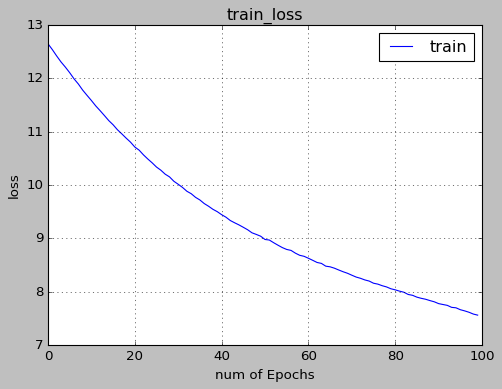

In [174]:
num_epoch = 100
train_loss=hist1.history['loss']
#val_loss=hist.history['val_loss']
#train_acc=hist.history['acc']
#val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [162]:
'''sgd=keras.optimizers.SGD()

def build_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=sgd,
              loss='mean_squared_error',
              metrics=['mae'])
    return model'''

"sgd=keras.optimizers.SGD()\n\ndef build_model():\n    model = Sequential()\n    model.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))\n    model.add(Dense(32,activation='relu'))\n    model.add(Dense(1))\n    model.compile(optimizer=sgd,\n              loss='mean_squared_error',\n              metrics=['mae'])\n    return model"

In [163]:
#from keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
#seed = 7
#np.random.seed(seed)
# evaluate model with standardized dataset
#estimators = []
#estimators.append(('standardize', StandardScaler()))
#estimators.append(('mlp', KerasRegressor(build_fn=build_model, epochs=100, batch_size=16, verbose=0)))
#pipeline = Pipeline(estimators)
#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(pipeline, X_test_scaled, y_test, cv=kfold)
#print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


In [164]:
#hist = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16,verbose=0)
#score = model.evaluate(X_test_scaled, y_test)
#print("Score is ",score)

In [165]:
#results = cross_val_score(pipeline, X_test_scaled, y_test, cv=kfold)
#print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))



In [166]:
#num_epoch = 100
#train_loss=hist.history['loss']

#xc=range(num_epoch)

#plt.figure(1,figsize=(7,5))
#plt.plot(xc,train_loss)
#plt.xlabel('num of Epochs')
#plt.ylabel('loss')
#plt.title('train_loss')
#plt.grid(True)
#plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

In [167]:
#predicted_value = model.predict(X_test_scaled)
#score = np.sqrt(metrics.mean_squared_error(y_test,predicted_value))
#print("Score (RMSE): {}".format(score))

In [168]:
#final_predict_df = pd.DataFrame({'time' : (predicted_value)})
final_predict_df = pd.DataFrame((predicted_value))

predicted_mean = predicted_value.mean()
final_predict_df[final_predict_df<0] = predicted_mean
final_predict_df.index.name='id'
final_predict_df.to_csv('/Users/soonam/Desktop/HKUST/Courses/MSBD5001/Project/Kaggle/submit25.csv')

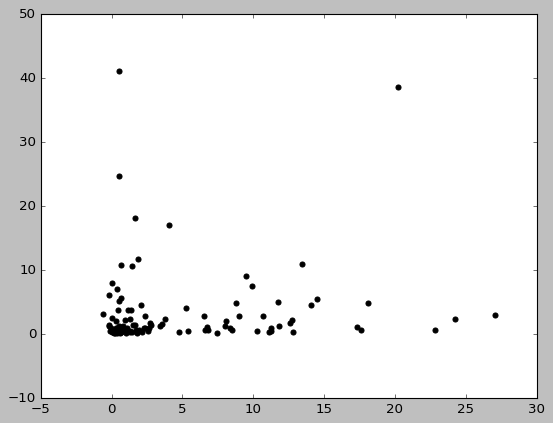

In [125]:
plt.scatter(predicted_value, y_test,  color='black')
plt.show()


In [ ]:
combined = X_before_train.append(test_pd_encoded)
combined.reset_index(inplace=True)
combined.drop(['index', 'id'], inplace=True, axis=1)

In [ ]:
combined.hist(figsize = (12,10))
plt.show()
combined.head()
